In [37]:
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

In [38]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [39]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [40]:
x_train = x_train / 255.0
x_test = x_test / 255.0


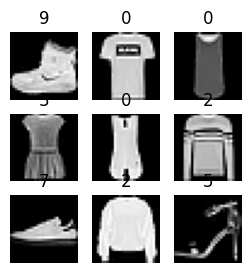

In [41]:
import numpy as np
import matplotlib.pyplot as plt

#Function to plot of grid of images
def plot_cifar_images(images, labels, num_images=9):
  #determine the grid size(3X3 for 9 imgs)
  grid_size=int(np.sqrt(num_images))

  #create a figure with subplots
  plt.figure(figsize=(3,3))
  for i in range(num_images):
    plt.subplot(grid_size, grid_size, i+1)#Subplot index
    plt.imshow(images[i], cmap='gray')#Graysscale display
    plt.title(labels[i])
    plt.axis('off')#Hide axes
  plt.show()

#Plot 9 images from the training set
plot_cifar_images(x_train, y_train, num_images=9)

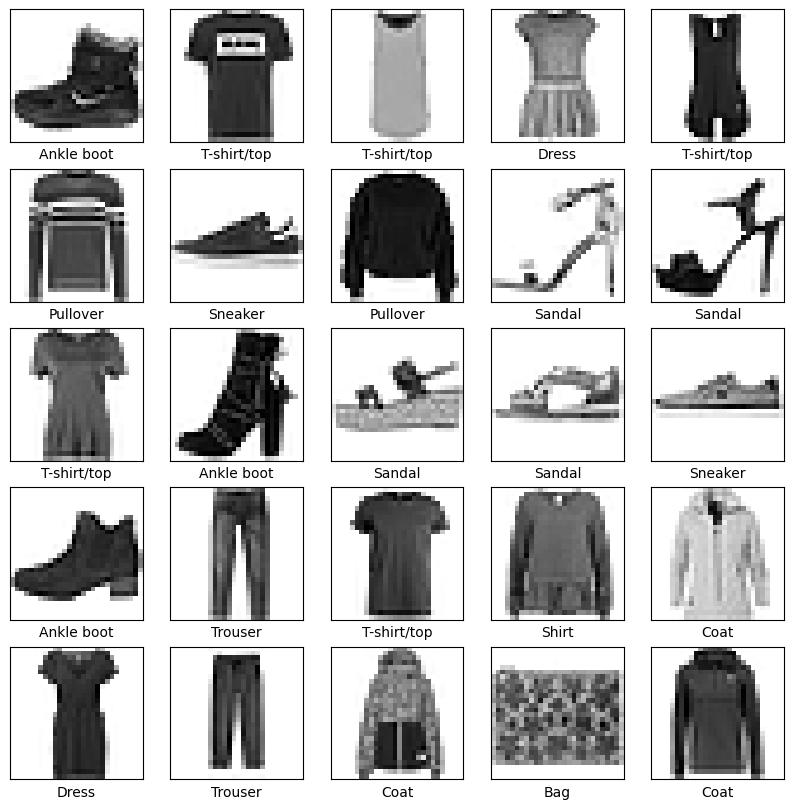

In [42]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [43]:
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]


In [44]:
#y_train = y_train.squeeze()
y_test = y_test.squeeze()


In [45]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [46]:
model = Sequential()

#1st CONV
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

"""
#2nd CONV
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

#3rd CONV
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))"""

#Fully-connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 214s 211ms/step - accuracy: 0.7947 - loss: 0.6258 - val_accuracy: 0.8621 - val_loss: 0.3542
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 201s 210ms/step - accuracy: 0.8846 - loss: 0.3123 - val_accuracy: 0.9012 - val_loss: 0.2700
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 193s 206ms/step - accuracy: 0.9065 - loss: 0.2582 - val_accuracy: 0.9060 - val_loss: 0.2634
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 204s 208ms/step - accuracy: 0.9171 - loss: 0.2224 - val_accuracy: 0.9147 - val_loss: 0.2414
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 202s 208ms/step - accuracy: 0.9263 - loss: 0.1982 - val_accuracy: 0.9138 - val_loss: 0.2378


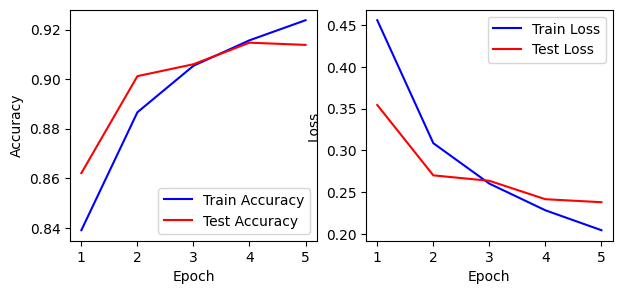

In [47]:
import matplotlib.pyplot as plt

acc2=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss2=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc2)+1)

#Creating subplots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
axes[0].plot(epochs,acc2,'b',label='Train Accuracy')
axes[0].plot(epochs,val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs,loss2,'b',label='Train Loss')
axes[1].plot(epochs,val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

#Adjusting layout for better spacing
plt.tight_layout
plt.show()